# Guardar variables de clasificadores



## Configuración del entorno

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

También vamos a cargar algunas funciones que nos resultarán interesantes.

In [2]:
def dibuja_dataset(X, y):  
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

In [3]:
def dibuja_dataset2(X, y, Xnew, ynew):  
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    plt.scatter(Xnew[:,0], Xnew[:, 1], c=ynew, cmap=cm_bright, edgecolors='k',marker='^', s = 200)

## Dataset

Como en otras ocasiones vamos a generar un dataset ficticio:

In [4]:
from sklearn.datasets import make_moons
dataset_X, dataset_y = make_moons(n_samples= 1000, noise=0.2, random_state=10)

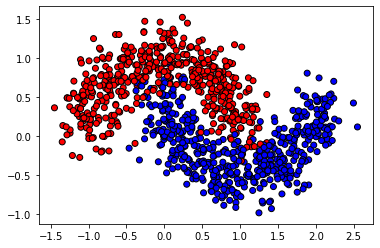

In [5]:
dibuja_dataset(dataset_X, dataset_y)

In [6]:
# Dividimos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.ensemble import GradientBoostingClassifier  

params_dist = {  
    "n_estimators": st.randint(3, 40), # Genera valores aleatorios entre el valor minimo y máximo
}

random_xgboost = RandomizedSearchCV(
    GradientBoostingClassifier(), 
    param_distributions=params_dist, 
    n_jobs=4, 
    n_iter=100, 
    scoring='roc_auc', 
    random_state=42
)

In [8]:
random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [9]:
print(random_xgboost.best_score_) #roc-auc, el usado por RandomizedSearchCV

0.9859066637833522


In [10]:
random_xgboost.best_params_

{'n_estimators': 38}

In [11]:
random_xgboost.score(X_train, y_train)  # accuracy

0.9977818627450981

In [12]:
random_xgboost.score(X_test, y_test) # accuracy

0.9870758928571429

### Predecir nuevas muestras

In [13]:
test_samples= np.array([[-1.,1.5],[-1.,0.],[0.,0.],[2.5,0.],[2.5,-1.]])

In [14]:
y_hat_samples =random_xgboost.predict(test_samples)
y_hat_samples

array([0, 0, 1, 1, 1], dtype=int64)

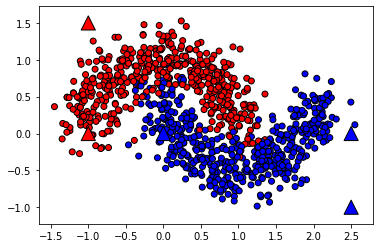

In [15]:
dibuja_dataset2(dataset_X, dataset_y,test_samples,y_hat_samples)

### Guardamos  las variables que nos interesan

In [16]:
import pickle     #pip install pickle 

# fichero donde dejaremos las variables
file = open('bck_var_pickle_modelo1.pkl', 'wb')

# dump las variables en el fichero
pickle.dump([random_xgboost,dataset_X, dataset_y], file)

# close the file
file.close()